In [158]:
import os
import sys
from typing import Tuple, Set, List
from tqdm import tqdm
from pprint import pprint
import numpy as np

os.chdir('/data/l989o/deployed/a')
if '/data/l989o/a' in sys.path:
    sys.path.remove('/data/l989o/a')

In [63]:
original_masks_folder = 'data/OMEandSingleCellMasks/Basel_Zuri_masks'
original_ome_folder = 'data/OMEandSingleCellMasks/ome'

masks_paths: Set[str] = set([os.path.join(original_masks_folder, f) for f in os.listdir(original_masks_folder)])
ome_paths: Set[str] = set([os.path.join(original_ome_folder, f) for f in os.listdir(original_ome_folder)])

print(f'len(masks_paths) = {len(masks_paths)}, len(ome_paths) = {len(ome_paths)}')
        
ome_and_masks: Set[Tuple[str, str]] = set()
excluded_masks: Set[str] = set()
for masks in masks_paths:
    m = os.path.basename(masks)
    m = m.replace('_maks', '')
    m = m.replace('_mask', '')
    n = 0
    found = None
    for ome in ome_paths:
        if m in ome:
            n += 1
            found = ome
    assert n <= 1, n
    if n == 0:
        excluded_masks.add(masks)
    else:
        a = (found, masks)
        ome_and_masks.add(a)
        ome_paths.remove(found)
        
print(f'len(excluded_masks) = {len(excluded_masks)}, remaining ome paths: {len(ome_paths)}')
print(f'mapped: {len(ome_and_masks)}')

pprint(excluded_masks)
pprint(ome_paths)

len(masks_paths) = 746, len(ome_paths) = 746
len(excluded_masks) = 11, remaining ome paths: 11
mapped: 735
{'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_Liver_Liver_X1Y1_2_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP41_33.475kx12.66ky_8500x8500_2_20170905_Liver_Liver_X2Y1_14_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP42_39.8kx13.885ky_7000x7000_2_20179015_Liver_Liver_X2Y1_92_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_Liver_Liver_X1Y1_3_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/BaselTMA_SP43_29.3kx15.5ky_7000x8000_3_20170928_Liver_Liver_X2Y1_90_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/ZTMA208_slide_13.25kx21.95ky_7000x7000_9_20171115_374_control_Cy15x6_465_a0_full_mask.tiff',
 'data/OMEandSingleCellMasks/Basel_Zuri_masks/ZTMA208_slide_13.25kx21.95ky_700

In [56]:
import hashlib

def md5(fname):
    hash_md5 = hashlib.md5()
    with open(fname, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

In [75]:
def md5_of_jonas_ome(ome):
    filename = os.path.basename(ome)
    return 'skipping the file'

def md5_of_jonas_masks(masks):
    filename = os.path.basename(masks)
    return 'skipping the file'

In [73]:
for ome, masks in ome_and_masks:
    print(os.path.basename(ome))
    print(os.path.basename(masks))
    print()
    break

ZTMA208_slide_28.23kx15.4ky_7000x7000_4_20171115_56_31_Ay7x8_460_a0_full.tiff
ZTMA208_slide_28.23kx15.4ky_7000x7000_4_20171115_56_31_Ay7x8_460_a0_full_maks.tiff



In [171]:
used_also_by_jonas: List[bool] = []

for ome, masks in tqdm(ome_and_masks):
    md5_ome = md5(ome)
    md5_masks = md5(masks)
    
    s = 'skipping the file'
    
    md5_jonas_ome = md5_of_jonas_ome(ome)
    md5_jonas_masks = md5_of_jonas_masks(masks)
    
    assert md5_jonas_ome != s and md5_jonas_masks != s or md5_jonas_ome == s and md5_jonas_masks == s
    
    if md5_jonas_ome != 'skipping the file':
        assert md5_ome == md5_jonas_ome
        assert md5_masks == md5_jonas_masks
        used_also_by_jonas.append(True)
    else:
        used_also_by_jonas.append(False)
        
    break
used_also_by_jonas = [False] * len(ome_and_masks)
used_also_by_jonas[0] = True

  0%|          | 0/735 [00:00<?, ?it/s]


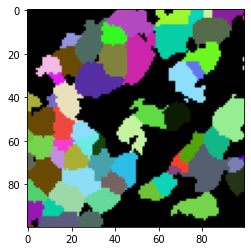

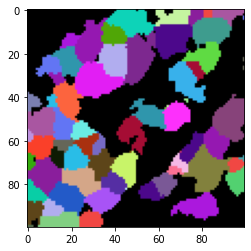

In [166]:
import tifffile
import skimage.measure
import matplotlib.pyplot as plt
import random

N_COLORS = 100
random_colors = np.random.rand(N_COLORS, 3)

for ome, masks in ome_and_masks: 
    if random.randint(0, 10) == 10:
        o = tifffile.imread(ome)
        m = tifffile.imread(masks)
        labels_are_contiguous = len(set(np.unique(m)).difference(set(range(max(np.unique(m)) + 1)))) == 0
        assert labels_are_contiguous
        
        def black_background_and_colored_cells(x):
            background = x == 0
            colored = random_colors[x % N_COLORS]
            colored[background] = np.array([0, 0, 0])
            return colored
        
        new_m = skimage.measure.label(m, connectivity=1)
        plt.figure()
        plt.imshow(black_background_and_colored_cells(m)[:100, :100])
        plt.show()
        plt.figure()
        plt.imshow(black_background_and_colored_cells(new_m)[:100, :100])
        plt.show()
        break

In [179]:
CHANNEL_NAMES = ['H3tot', 'H3met', 'CK5', 'Fibronectin', 'CK19', 'CK8/18', 'TWIST1', 'CD68', 'CK14', 'SMA',
                 'Vimentin', 'Myc', 'HER2', 'CD3', 'H3phospho', 'ERK1/2', 'SLUG', 'ER', 'PR', 'p53', 'CD44',
                 'EpCAM', 'CD45', 'GATA3', 'CD20', 'betaCatenin', 'CAIX', 'Ecadherin', 'Ki67', 'EGFR', 'S6',
                 'Sox9', 'vWf_CD31', 'mTOR', 'CK7', 'panCK', 'cPARP_cCasp3', 'DNA1', 'DNA2']

CHANNELS_TO_KEEP = [8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                    23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
                    36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]

assert len(CHANNEL_NAMES) == len(CHANNELS_TO_KEEP)

In [183]:
import vigra

def extract_features_for_ome(ome, masks):
    ome = np.require(ome, requirements=['C'])
    vigra_ome = vigra.taggedView(ome, 'xyc')
    masks = masks.astype(np.uint32)
    features = ['Mean', 'RegionCenter']
    features = vigra.analysis.extractRegionFeatures(vigra_ome, labels=masks, ignoreLabel=0, features=features)
    features = {k: v for k, v in features.items()}
    return features

In [188]:
for i, (ome, masks) in enumerate(tqdm(ome_and_masks)):
    if used_also_by_jonas[i]:
        o = tifffile.imread(ome)[CHANNELS_TO_KEEP, :, :]
        o = np.moveaxis(o, 0, 2)
        m = tifffile.imread(masks)
        # for each cell, prepare for forward to the model
        features = extract_features_for_ome(o, m)
        mean = features['Mean'][1:]
        centers = features['RegionCenter'][1:]
        assert len(mean) == len(centers)
        assert len(mean) == np.max(m)

100%|██████████| 735/735 [00:00<00:00, 6156.54it/s]
